**Created by Berkay Alan**

**Classification | Random Forest**

**17 January 2022**

**For more Tutorial:** https://github.com/berkayalan

## Resources

- **The Elements of  Statistical Learning** - Trevor Hastie,  Robert Tibshirani, Jerome Friedman -  Data Mining, Inference, and Prediction (Springer Series in Statistics) 

- [**What is a Confusion Matrix in Machine Learning?**](https://machinelearningmastery.com/confusion-matrix-machine-learning/)

- [**Classification: Precision and Recall**](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)

- [**Classification: ROC Curve and AUC**](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

- [**AUC-ROC Curve in Machine Learning Clearly Explained**](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/)

## Importing Libraries

In [104]:
from warnings import filterwarnings
filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,scale, RobustScaler
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score,roc_curve, classification_report,mean_squared_error,f1_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier,BaseEnsemble,GradientBoostingClassifier
import time
from skompiler import skompile

In order to see all rows and columns, we will increase max display numbers of dataframe.

In [106]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Classification and Evaluation Metrics

### Classification

Classification is the process of finding or discovering a model or function which helps in separating the data into multiple categorical classes i.e. discrete values. In classification, data is categorized under different labels according to some parameters given in input and then the labels are predicted for the data. 
The derived mapping function could be demonstrated in the form of “IF-THEN” rules. The classification process deal with the problems where the data can be divided into binary or multiple discrete labels. 

Some use-cases:

- Mail classification (spam or not)

- Diagnosis of the sicknesses

- Customer buying prediction (if customer will buy or not)

### Evaluation Metrics

#### Confusion Matrix

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate our model.  Confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

- **true positive**: These are cases in which we predicted positive, and they are actually positive.
- **false positive (Type 1 Error)**: We predicted postive, but they are actually negative. (Also known as a "Type 1 error.")
- **true negative**: We predicted negative, and they are actually negative.
- **false negative (Type 2 Error)**: We predicted negative, but they are actually postive. (Also known as a "Type 2 error.")

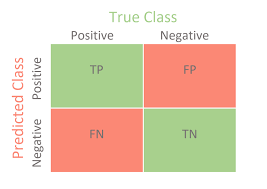

Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fconfusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826&psig=AOvVaw29atdmY9s4wmI-rc0qQZZb&ust=1628435461495000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCKj1g_2Yn_ICFQAAAAAdAAAAABAD).

**Notation**: TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

#### Accuracy

Accuracy is one metric for evaluating classification models. Informally, accuracy is **the fraction of predictions our model got right**.

Formally, accuracy has the following definition: All correct predictions / all predictions

For binary classification, accuracy can also be calculated in terms of positives and negatives as follow: (TP+TN) / (TP+FP+FN+TN)

#### Recall

Recall gives us the answer of this question :

**What proportion of actual positives was identified correctly?**

It is defined as follows: TP / (TP+FN)

#### Precision

Precision gives us the answer of this question : 

**What proportion of positive identifications was actually correct?**

It is defined as follows: TP / (TP+FP)

#### F1 - Score

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. 

The formula for the F1 score is: 2 * (precision * recall) / (precision + recall)

#### ROC Curve (Receiver Operating Characteristic Curve)

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 

An ROC curve plots TP rates vs. FP rares at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

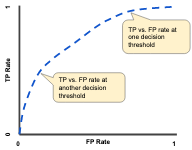

To compute the points in an ROC curve, we could evaluate a classification model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.

#### AUC (Area under Curve)

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

This is an example of AUC:

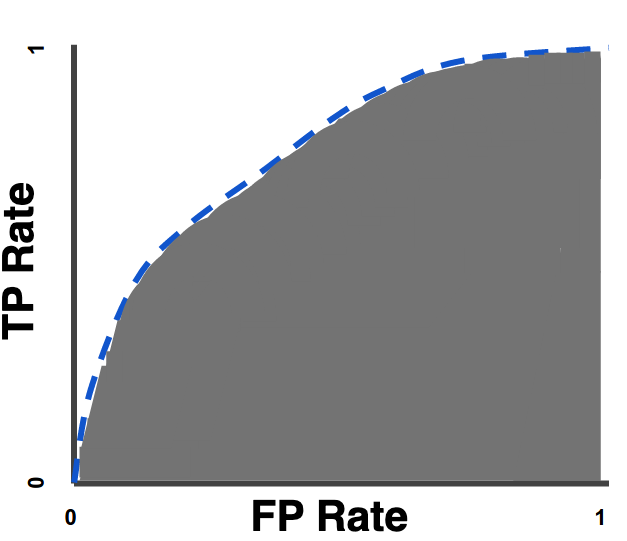

## Ensemble Learning - Random Forests Classification

### Theory

Random Forest is also an example of ensemble learning, in which we combine multiple machine learning algorithms to obtain better predictive performance.

The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. Feature randomness, also known as feature bagging or “the random subspace method”, generates a random subset of features, which ensures low correlation among decision trees. This is a key difference between decision trees and random forests. While decision trees consider all the possible feature splits, random forests only select a subset of those features.

Let's try to understand with an example. For example, I want to watch a movie today and I am not sure what to watch. After calling one of my best friends, she recommend a movie to me according to my old preferences that she know. At this point, my old preferences are training set for her. It's a classical decision tree. But if I would get recommendations from my 20 different friends and select most voted movie, that would be **Random Forests**.

Random forest algorithms have three main hyperparameters, which need to be set before training. These include node size, the number of trees, and the number of features sampled. From there, the random forest classifier can be used to solve for regression or classification problems.

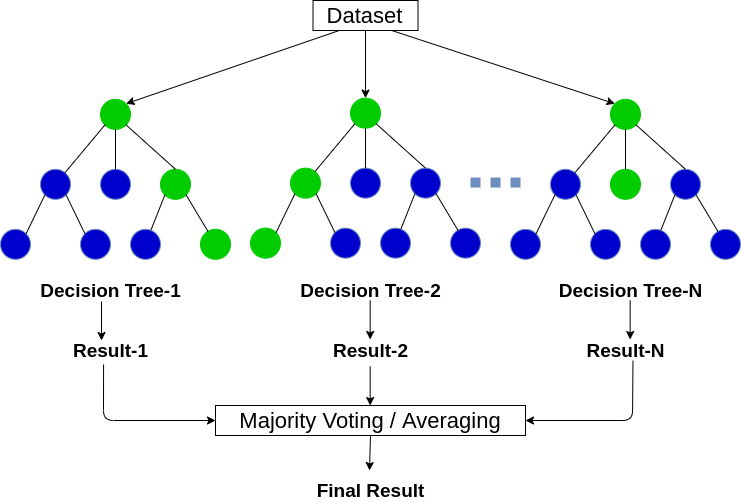

Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.analyticsvidhya.com%2Fblog%2F2020%2F05%2Fdecision-tree-vs-random-forest-algorithm%2F&psig=AOvVaw2jevf2JFgvEKCBieh5yaHX&ust=1627289101408000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCICY4bvq_fECFQAAAAAdAAAAABAD)

Yet another great quality of Random Forests is that they make it easy to measure the relative *importance of each feature*. Scikit-Learn measures a feature’s importance by looking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). More precisely, it is a weighted average, where each node’s weight is equal to the number of training samples that are associated with it. 

Another advantage of sampling over the features is that it makes the decision making process more robust to missing data: observations (from the training dataset or not) with missing data can still be regressed or classified based on the trees that take into account only features where data are not missing. Thus, random forest algorithm combines the concepts of bagging and random feature subspace selection to create more robust models.

### Model

For a real world example, we will work with **Pima Indians Diabetes** dataset by UCI Machine Learning as before.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

We will try to predict whether the patient has diabetes or not.

In [453]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [454]:
df.shape

(768, 9)

In [455]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [456]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [457]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [458]:
random_forest = RandomForestClassifier().fit(X_train,y_train)

In [459]:
random_forest

RandomForestClassifier()

In [460]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

As we say in the theory section, we can see importances of features in Random Forests.

In [473]:
feature_importances =pd.DataFrame({"Features":X_train.columns,
              "Feature Imporances": random_forest.feature_importances_}).sort_values(by="Feature Imporances")

In [474]:
feature_importances.head()

,Features,Feature Imporances
3,SkinThickness,0.067154
0,Pregnancies,0.080799
4,Insulin,0.084634
2,BloodPressure,0.088854
6,DiabetesPedigreeFunction,0.123966


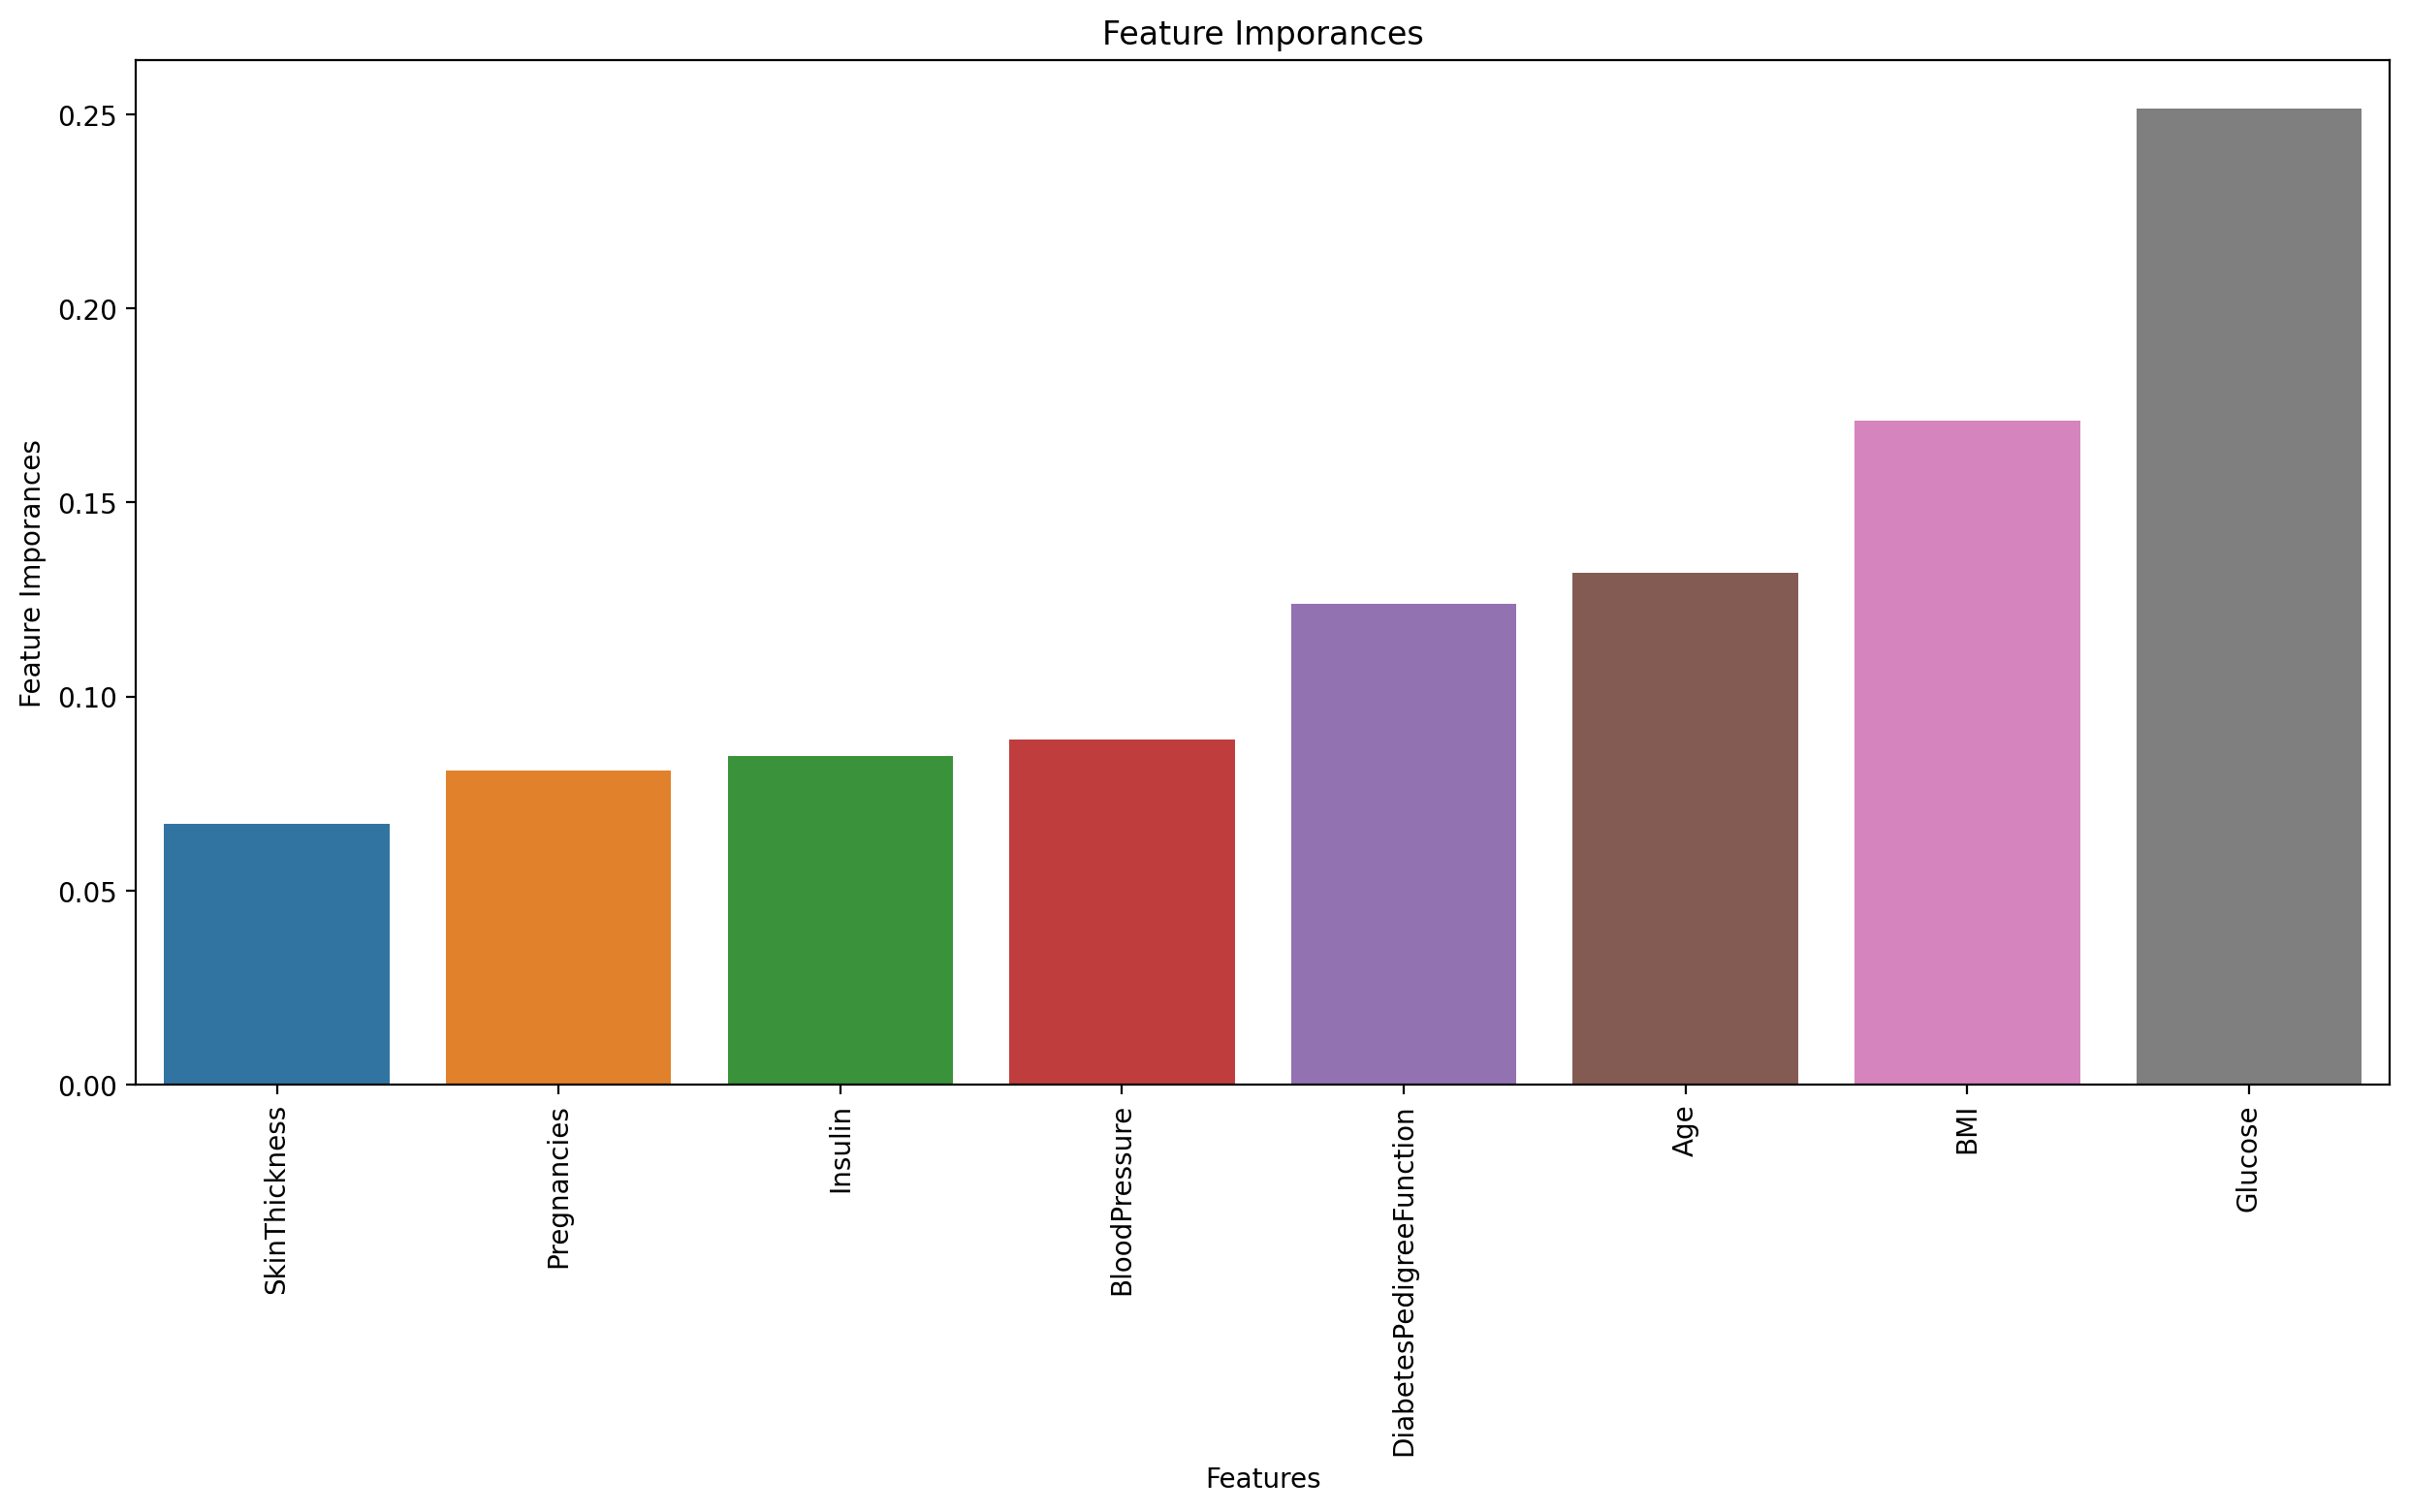

In [476]:
plt.figure(figsize=(15,7),dpi=200)
sns.barplot(data=feature_importances,x="Features",y="Feature Imporances")
plt.title("Feature Imporances")
plt.xticks(rotation=90)
plt.show()

Total of ratios should be equal to 1.

In [478]:
feature_importances["Feature Imporances"].cumsum()

3    0.067154
0    0.147953
4    0.232587
2    0.321442
6    0.445408
7    0.577309
5    0.748512
1    1.000000
Name: Feature Imporances, dtype: float64

### Prediction

In [480]:
random_forest

RandomForestClassifier()

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate out model.

In [482]:
y_pred = random_forest.predict(X_test)

In [483]:
cm = confusion_matrix(y_test,y_pred)

In [484]:
cm

array([[98, 10],
       [24, 36]])

In [485]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7976190476190477


In [486]:
accuracy_score(y_test,y_pred)

0.7976190476190477

In [487]:
recall_score(y_test,y_pred)

0.6

In [488]:
precision_score(y_test,y_pred)

0.782608695652174

In [489]:
f1_score(y_test,y_pred)

0.6792452830188679

In [490]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       108
           1       0.78      0.60      0.68        60

    accuracy                           0.80       168
   macro avg       0.79      0.75      0.77       168
weighted avg       0.80      0.80      0.79       168



### Model Tuning

In [492]:
random_forest

RandomForestClassifier()

Now we will try to tune our model by using **K-Fold Cross Validation**.

In [493]:
accuracies= cross_val_score(estimator=random_forest,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 76.00 %
Standart Deviation of Accuracies: 6.24 %


In [494]:
random_forest.predict(X_test)[:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

Now we will tune our model with GridSearch. We will tune *criterion*,max_features,*n_estimators* and *max_depth* parameters.

In [498]:
random_forests_params = {"max_depth": list(range(1,10)),
                         "max_features":[2,5,7, 8],
                         "n_estimators":[300,500,1000,1700,2000],
                         "criterion":["gini","entropy"]}

All hyperparameters can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [499]:
random_forest_classifier = RandomForestClassifier()
random_forest_cv = GridSearchCV(random_forest_classifier,random_forests_params,cv=9,n_jobs=-1,verbose=2)

In [500]:
start_time = time.time()

random_forest_cv.fit(X_train,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for Random Forests Classifier cross validation: "
      f"{elapsed_time:.3f} seconds")

Fitting 9 folds for each of 360 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed: 29.9min finished


Elapsed time for Random Forests Classifier cross validation: 1793.859 seconds


In [501]:
#best score
random_forest_cv.best_score_

0.7701140760842253

In [502]:
#best parameters
random_forest_cv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 2, 'n_estimators': 500}

In [504]:
random_forest_tuned = RandomForestClassifier(criterion="gini",max_depth=5,max_features=2,
                                             n_estimators=500).fit(X_train,y_train)

In [505]:
random_forest_tuned

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=500)

In [506]:
y_pred = random_forest_tuned.predict(X_test)

In [507]:
cm = confusion_matrix(y_test,y_pred)

In [508]:
cm

array([[98, 10],
       [26, 34]])

In [509]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

Our Accuracy is:  0.7857142857142857


In [510]:
accuracy_score(y_test,y_pred)

0.7857142857142857

In [511]:
recall_score(y_test,y_pred)

0.5666666666666667

In [512]:
precision_score(y_test,y_pred)

0.7727272727272727

In [513]:
f1_score(y_test,y_pred)

0.6538461538461539

In [514]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       108
           1       0.77      0.57      0.65        60

    accuracy                           0.79       168
   macro avg       0.78      0.74      0.75       168
weighted avg       0.78      0.79      0.78       168



Let's look at the importances of features.

In [515]:
Importances = pd.DataFrame({"Importance":random_forest_tuned.feature_importances_*100},index=X_train.columns)

In [516]:
Importances.head()

,Importance
Pregnancies,6.324532
Glucose,33.418251
BloodPressure,5.098596
SkinThickness,4.923197
Insulin,8.376611


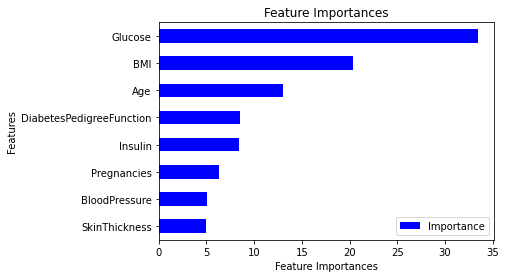

In [517]:
Importances.sort_values(by="Importance",axis=0,ascending=True).plot(kind="barh",color="b")
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.title("Feature Importances");

If you want to see other algorithms such as:

- Logistic Regression (Theory - Model- Tuning)

- Decision Tree Classification (Theory - Model- Tuning)

- Support Vector Machines(SVC) - Linear Kernel (Theory - Model- Tuning)

- Support Vector Machines(SVC) - Radial Basis Kernel (Theory - Model- Tuning)

- Naive Bayes Classification (Theory - Model)

- K - Nearest Neighbors(KNN) (Theory - Model- Tuning)

- XGBoost(Extreme Gradient Boosting) Classification (Theory - Model- Tuning)

Please visit my [Classification tutorial](https://github.com/berkayalan/Data-Science-Tutorials/blob/master/Classification/Classification.ipynb)